# Visualize river classification system

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import matplotlib
import pickle
import cmocean
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm

%matplotlib notebook

###### Parameters:

In [67]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# runoff period:
rf_year  = 2015
rf_month = 8    # september 

land_color = '#a9a7a2'

# colours:
c_continent = '#ce9169'
c_glacier   = '#36ab92'
# c_other     = '#a6a6a6'

# c_glacier   = '#59a0b6'
# c_continent = '#e79966'
# # c_glacier   = '#0b8fdf'
c_other     = '#747474'

# Resolution of grid cells to show in figure:
grid_reso = 10

###### Load files:

River runoff forcing

In [5]:
rf_file = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+\
               'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y'+str(rf_year)+'.nc','r')
lon_rf  = np.array(rf_file.variables['nav_lon'])
lat_rf  = np.array(rf_file.variables['nav_lat'])
rf      = np.array(rf_file.variables['runoff'][rf_month])

# Place NaNs where there is no runoff
rf[rf == 0]       = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

River classification file
1. Glaciers
2. Continental
3. Other

In [6]:
ncd         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class-202005.nc')
river_class = np.array(ncd.variables['rclass'])

Meshmask

In [7]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

##### Map with bathymetry background

<IPython.core.display.Javascript object>


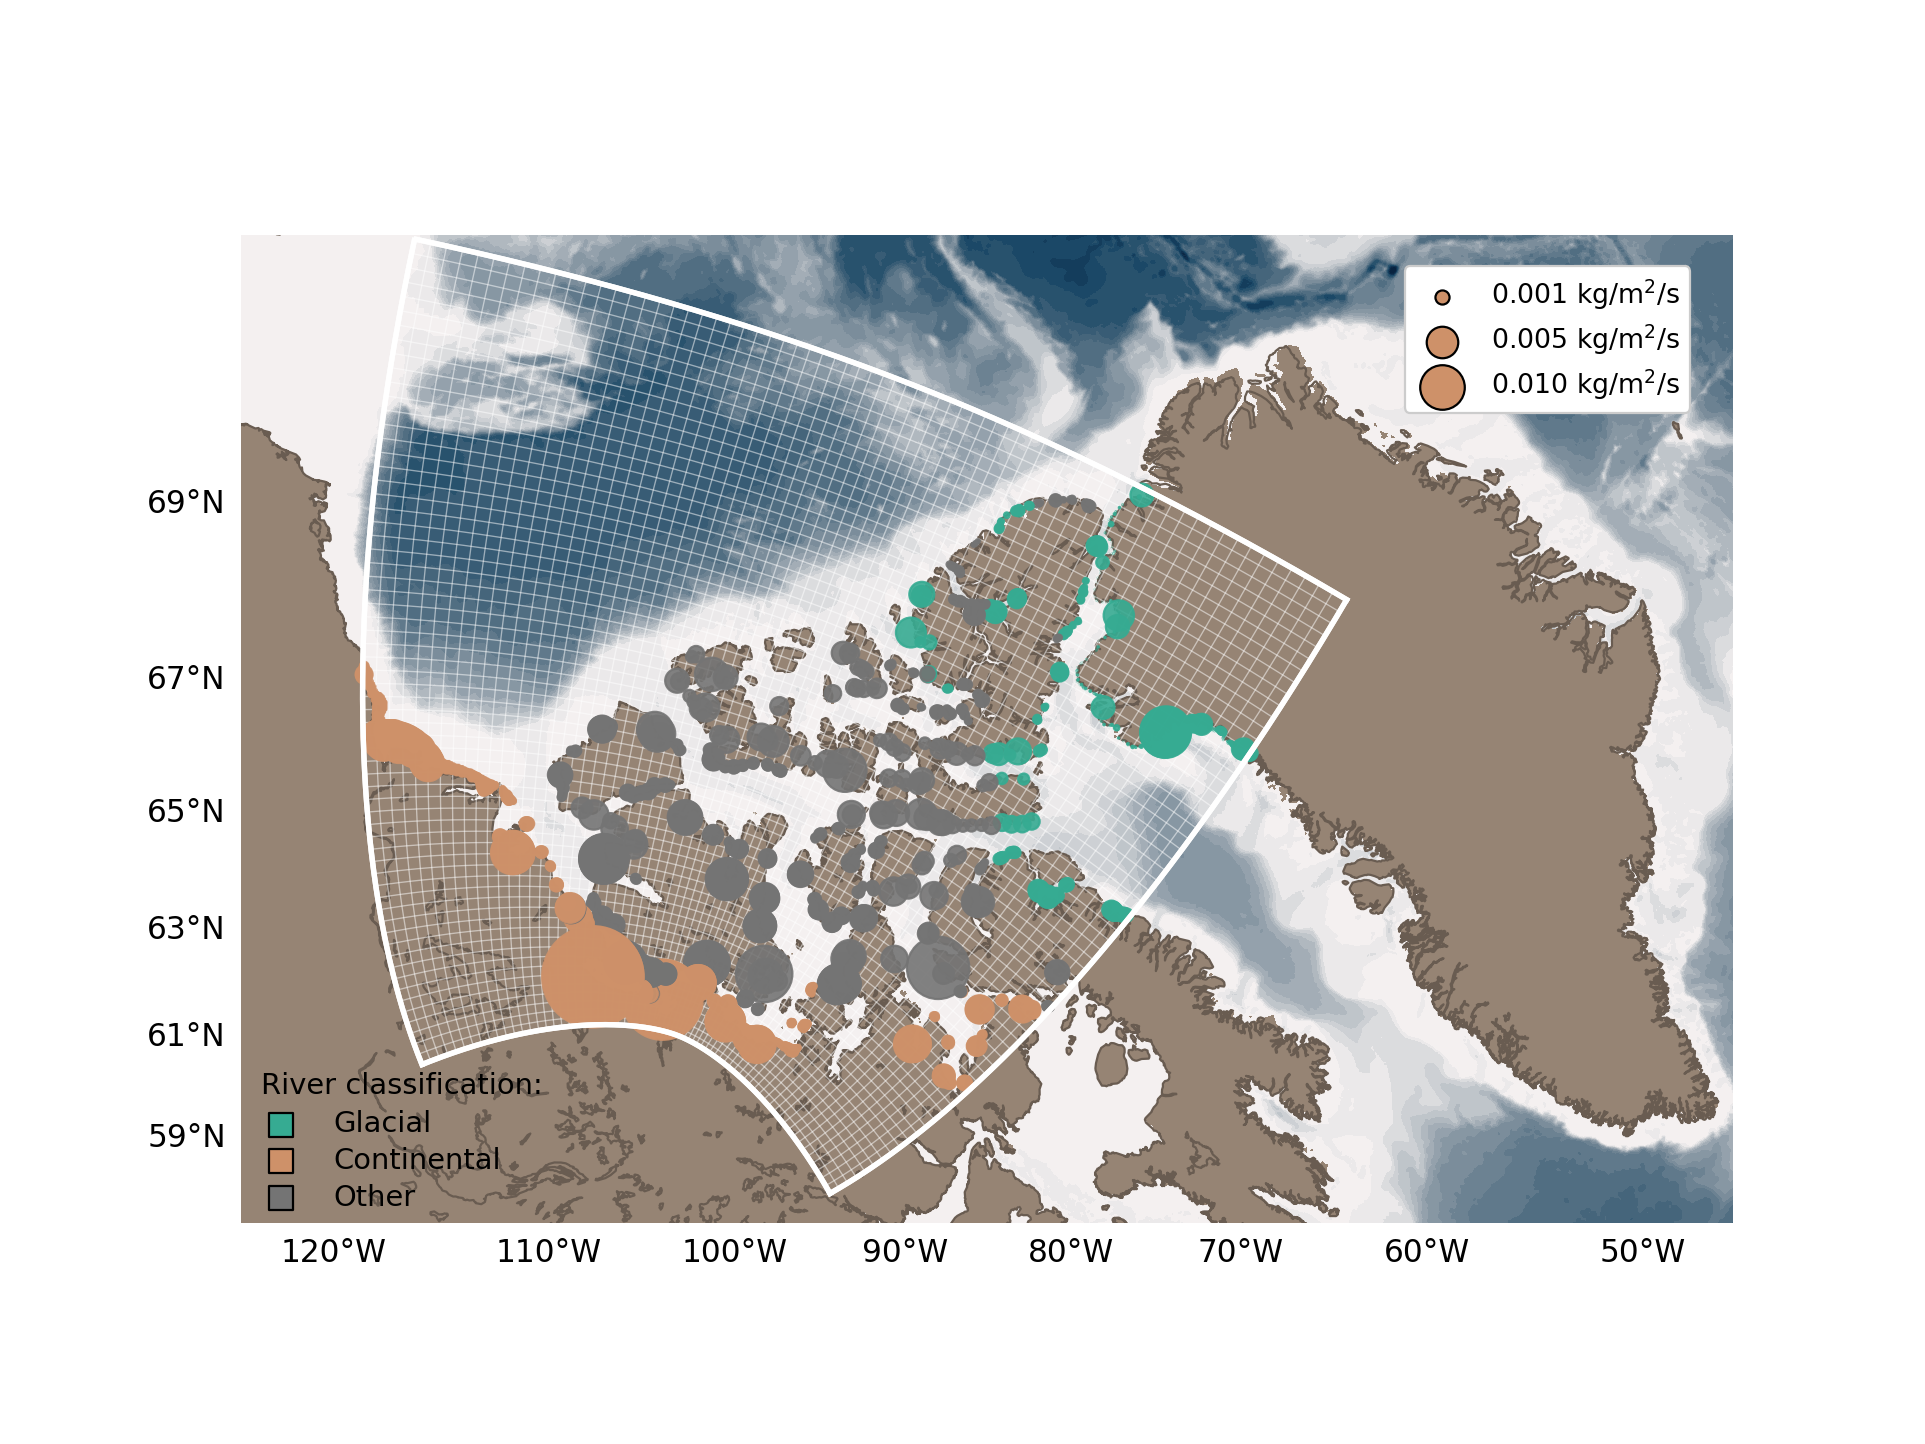

In [78]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map2.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(lon, lat) 
x_rf,    y_rf = proj1(lon_rf, lat_rf)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'w-', lw=2.4, zorder=3)
proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'w-', lw=2.4, zorder=3)

proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], 'w-', lw=0.6, zorder=2, alpha=0.5);
proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, 'w-', lw=0.6, zorder=2, alpha=0.5);

colormap = colors.ListedColormap([c_glacier, c_continent, c_other, c_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=river_class[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*4e4, alpha=0.9, cmap=colormap, zorder=3)

for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c=c_continent, alpha=1, s=float(a)*4e4, label=a + ' kg/m$^2$/s', \
                  edgecolors='k', zorder=4)

l1 = ax1.legend(scatterpoints=1, frameon=True, framealpha=1, labelspacing=0.4, fontsize=12, loc=(0.78, 0.82))

g = proj1.scatter([], [], c=c_glacier  , alpha=1, s=120, edgecolors='k', zorder=4, marker='s')
c = proj1.scatter([], [], c=c_continent, alpha=1, s=120, edgecolors='k', zorder=4, marker='s')
o = proj1.scatter([], [], c=c_other    , alpha=1, s=120, edgecolors='k', zorder=4, marker='s')
l2 = ax1.legend([g, c, o], ['Glacial', 'Continental', 'Other'], \
                scatterpoints=1, frameon=False, labelspacing=0.3, fontsize=13, loc=(0.00, 0.00))


ax1.text(0.6e5, 3.9e5, 'River classification: ', fontsize=13, zorder=4)

plt.gca().add_artist(l1)
proj1.drawcoastlines(color='#695c51')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/M1-river-class.png', bbox_inches='tight', dpi=300)